# Regression for Predicting of House Preices

## Defining the Question

### a) Problem Statement

This work will focus on:
  1. Identifying the factors that affect house prices
  2. Predicting house prices given a set of predictor variables

### b) Success Metrics
* Accuracy score of above 80%
* Least possible RMSE value
* Identifying the best Model


### c) Understanding the context 

Hass Consulting Company is a real estate leader with over 25 years of experience. The company wishes to understand the factors that affect the price of a house and to further build a model to predict the price of a house given a set of the predictor variables.

### d) Recording the Experimental Design

* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis. This will be done using the following regression techniques:
      1. Linear Regression
      2. Quantile Regression
      3. Ridge Regression
      4. Lasso Regression
      5. Elastic Net Regression
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

The data contains much of the factors that are considered when purchasing a house. Worth noting is that each of these features comes at a cost. For example extra room implies extra cost and so on.

## Reading the Data and Loading Dependencies

In [1]:
# DEPENDENCIES

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Processes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading data
data = pd.read_csv('/content/house_data.csv')

## Checking the Data

In [3]:
# No of records in our dataset
data.shape

(21613, 20)

In [4]:
# Previewing the data
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

* The 'id' variable is not useful for our analysis
* 'price' is the **independent variable** and we shall explore its relation with to the other variables
* There is no missing value in this data
* In so much as the following columns are numeric 'bedroom', 'bathrooms', 'floors', 'waterfront', 'year_built', 'zip_code' represent **nominal values**

In [6]:
# Dropping the 'id' column
data = data.drop(['id'], axis=1)

Exploring the dependent variable "price"

In [7]:
data['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

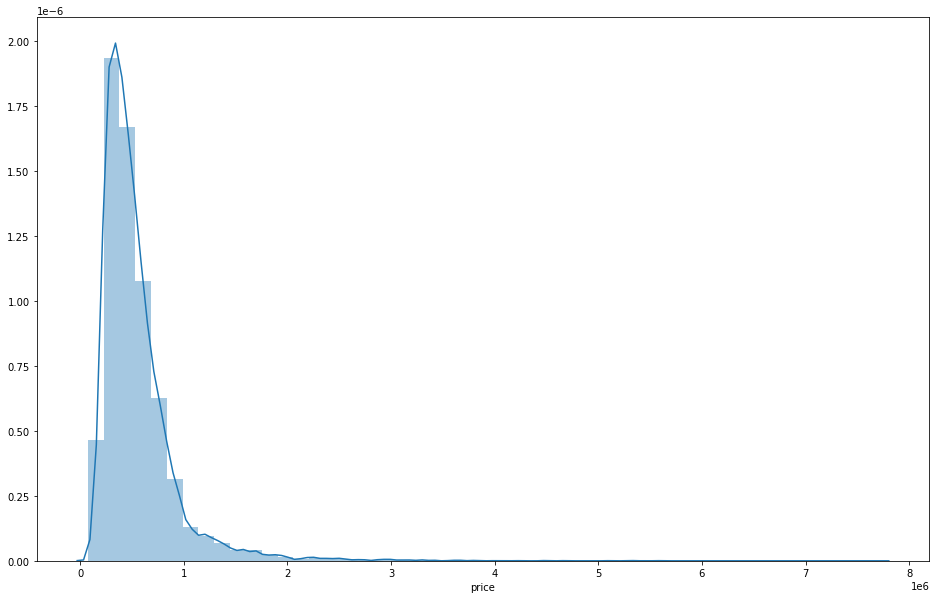

In [8]:
# histogram
plt.subplots(figsize=(16, 10))
sns.distplot(data['price'])

In [9]:
# skewness and kurtosis
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


**Relationship with numerical variables**

sqft_living

Text(0.5, 1.0, 'Plot of sqft_living vs Price')

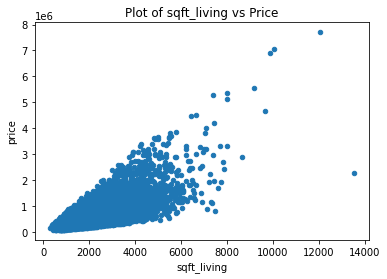

In [10]:
# Scatter plot sqft_living/price
data.plot.scatter(x='sqft_living', y='price')
plt.title('Plot of sqft_living vs Price')

* There is a **linear relationship between the sqft_living and the price** of the house

sqft_above

Text(0.5, 1.0, 'Plot of sqft_above vs Price')

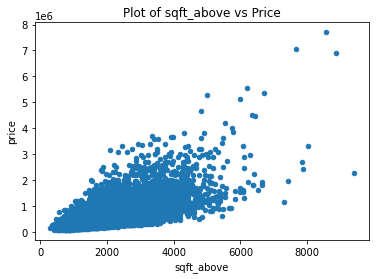

In [11]:
# Scatter plot sqft_above/price
data.plot.scatter(x='sqft_above', y='price')
plt.title('Plot of sqft_above vs Price')

* There is a linear relationship between sqft_above vs Price

sqft_basement

Text(0.5, 1.0, 'Plot of sqft_basement vs Price')

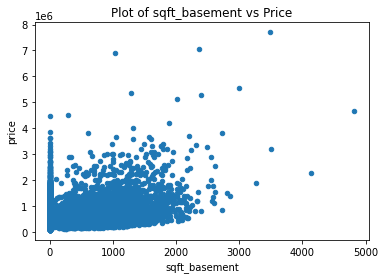

In [12]:
# Scatter plot sqft_basement/price
data.plot.scatter(x='sqft_basement', y='price')
plt.title('Plot of sqft_basement vs Price')

lat vs price

Text(0.5, 1.0, 'Plot of lat vs Price')

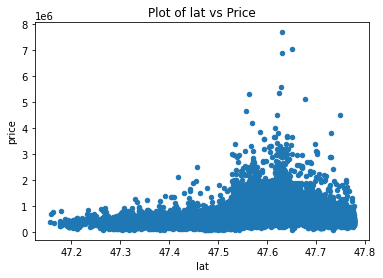

In [13]:
# Scatter plot lat/price
data.plot.scatter(x='lat', y='price')
plt.title('Plot of lat vs Price')

* Houses falling in a certain latitude are generally expensive

long vs price

Text(0.5, 1.0, 'Plot of long vs Price')

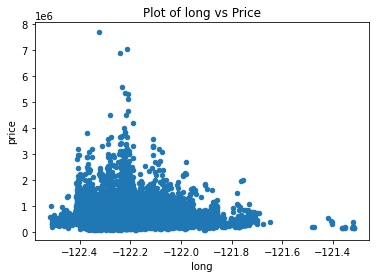

In [14]:
# Scatter plot long/price
data.plot.scatter(x='long', y='price')
plt.title('Plot of long vs Price')

* Houses in some longitude are generally expensive 

sqft_living15 vs price

Text(0.5, 1.0, 'Plot of sqft_living15 vs Price')

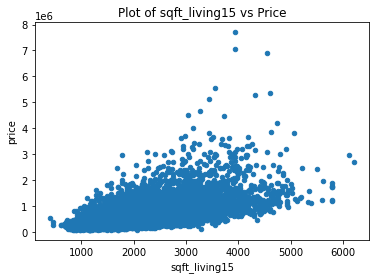

In [15]:
# Scatter plot sqft_living15/price
data.plot.scatter(x='sqft_living15', y='price')
plt.title('Plot of sqft_living15 vs Price')

* There may be a linear relationship in the data

sqft_lot vs price

Text(0.5, 1.0, 'Plot of sqft_lot vs Price')

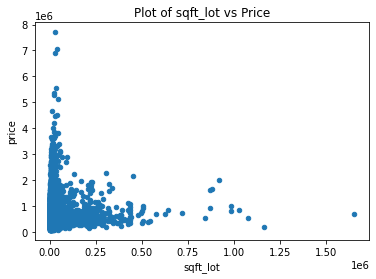

In [16]:
# Scatter plot sqft_lot/price
data.plot.scatter(x='sqft_lot', y='price')
plt.title('Plot of sqft_lot vs Price')

**Relationship with categorical features**

The following columns in the dataset shall be considered as categorical dataset:

* bedrooms
* bathrooms
* floors
* waterfront
* year_build
* zipcode
* condition
* grade
* yr_renovated 

Number of Bedroom vs Price

Text(0.5, 1.0, 'Number of Bedrooms vs House Price')

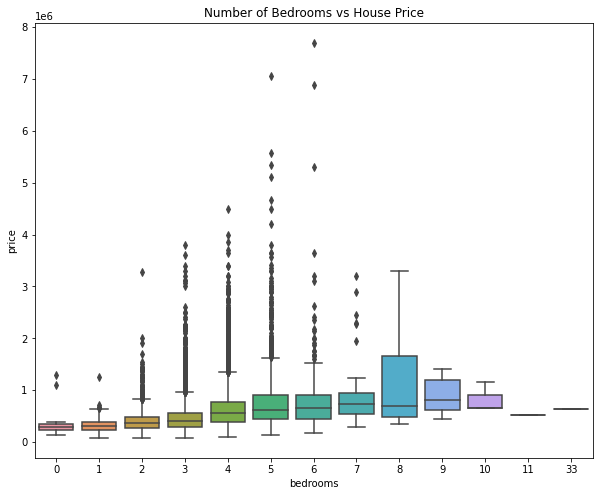

In [17]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Number of Bedrooms vs House Price')

* Generally the median prices of houses increase with increase in number of bedrooms
* There are houses with relatively few bedrooms that are generally expensive. Other factors could contribute to this. For example, location and so on

Number of Bathroom

Text(0.5, 1.0, 'Number of Bathrooms vs House Price')

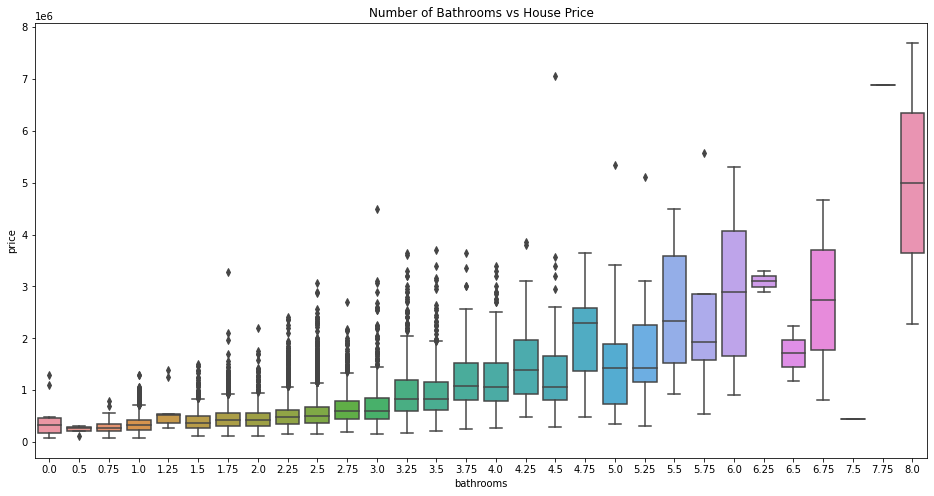

In [18]:
plt.subplots(figsize=(16, 8))
sns.boxplot(x='bathrooms', y='price', data=data)
plt.title('Number of Bathrooms vs House Price')

* There is a gradual increase in house prices with increase in number of baths
* There are houses with relatively few bathrooms that are generally expensive. This could be as a result of other factors such as finishes used and the location of the house



Number of Floors

Text(0.5, 1.0, 'Number of Floors vs House Price')

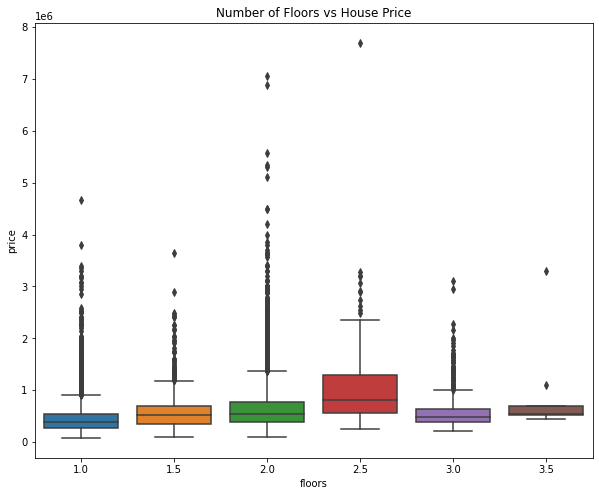

In [19]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='floors', y='price', data=data)
plt.title('Number of Floors vs House Price')

* The number of floors does not significantly affect the price of the house. Houses with more floors still cost as much as those with fewer floors

Waterfront

Text(0.5, 1.0, 'Proximity to Waterfront vs House Price')

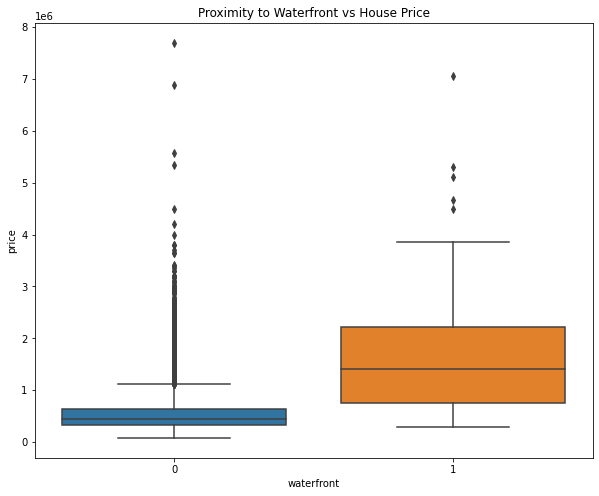

In [20]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='waterfront', y='price', data=data)
plt.title('Proximity to Waterfront vs House Price')

* Generally the prices of houses proximal to a waterfront are highly priced
* However, there are houses away from a waterfront that are more priced than those at a waterfront. Other factors may contribute to this such as location, finishes among other things

Year built

Text(0.5, 1.0, 'Year_Built vs House Price')

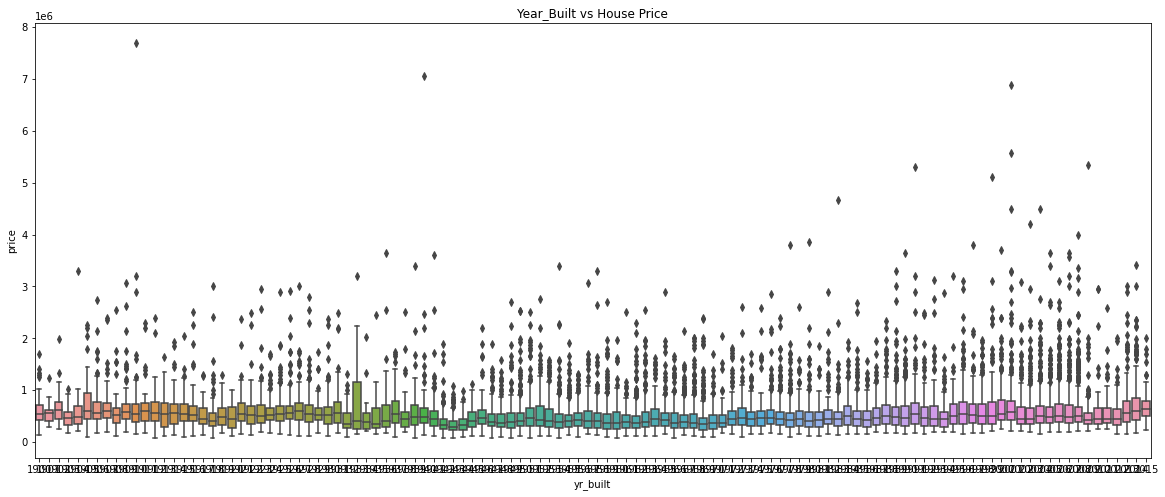

In [21]:
plt.subplots(figsize=(20, 8))
sns.boxplot(x='yr_built', y='price', data=data)
plt.title('Year_Built vs House Price')

In [22]:
# Building year of the most expensive house
data[data.price == max(data.price)]['yr_built']

7252    1910
Name: yr_built, dtype: int64

* The year of building a house does not affect much the price of a house
* The most expensive house was built in **1910**
* Others houses that are highly priced were built in the recent past and their high prices may be as a result of technologies that are incorporated in the buildings.

Zip Code

Text(0.5, 1.0, 'Zip Code vs House Price')

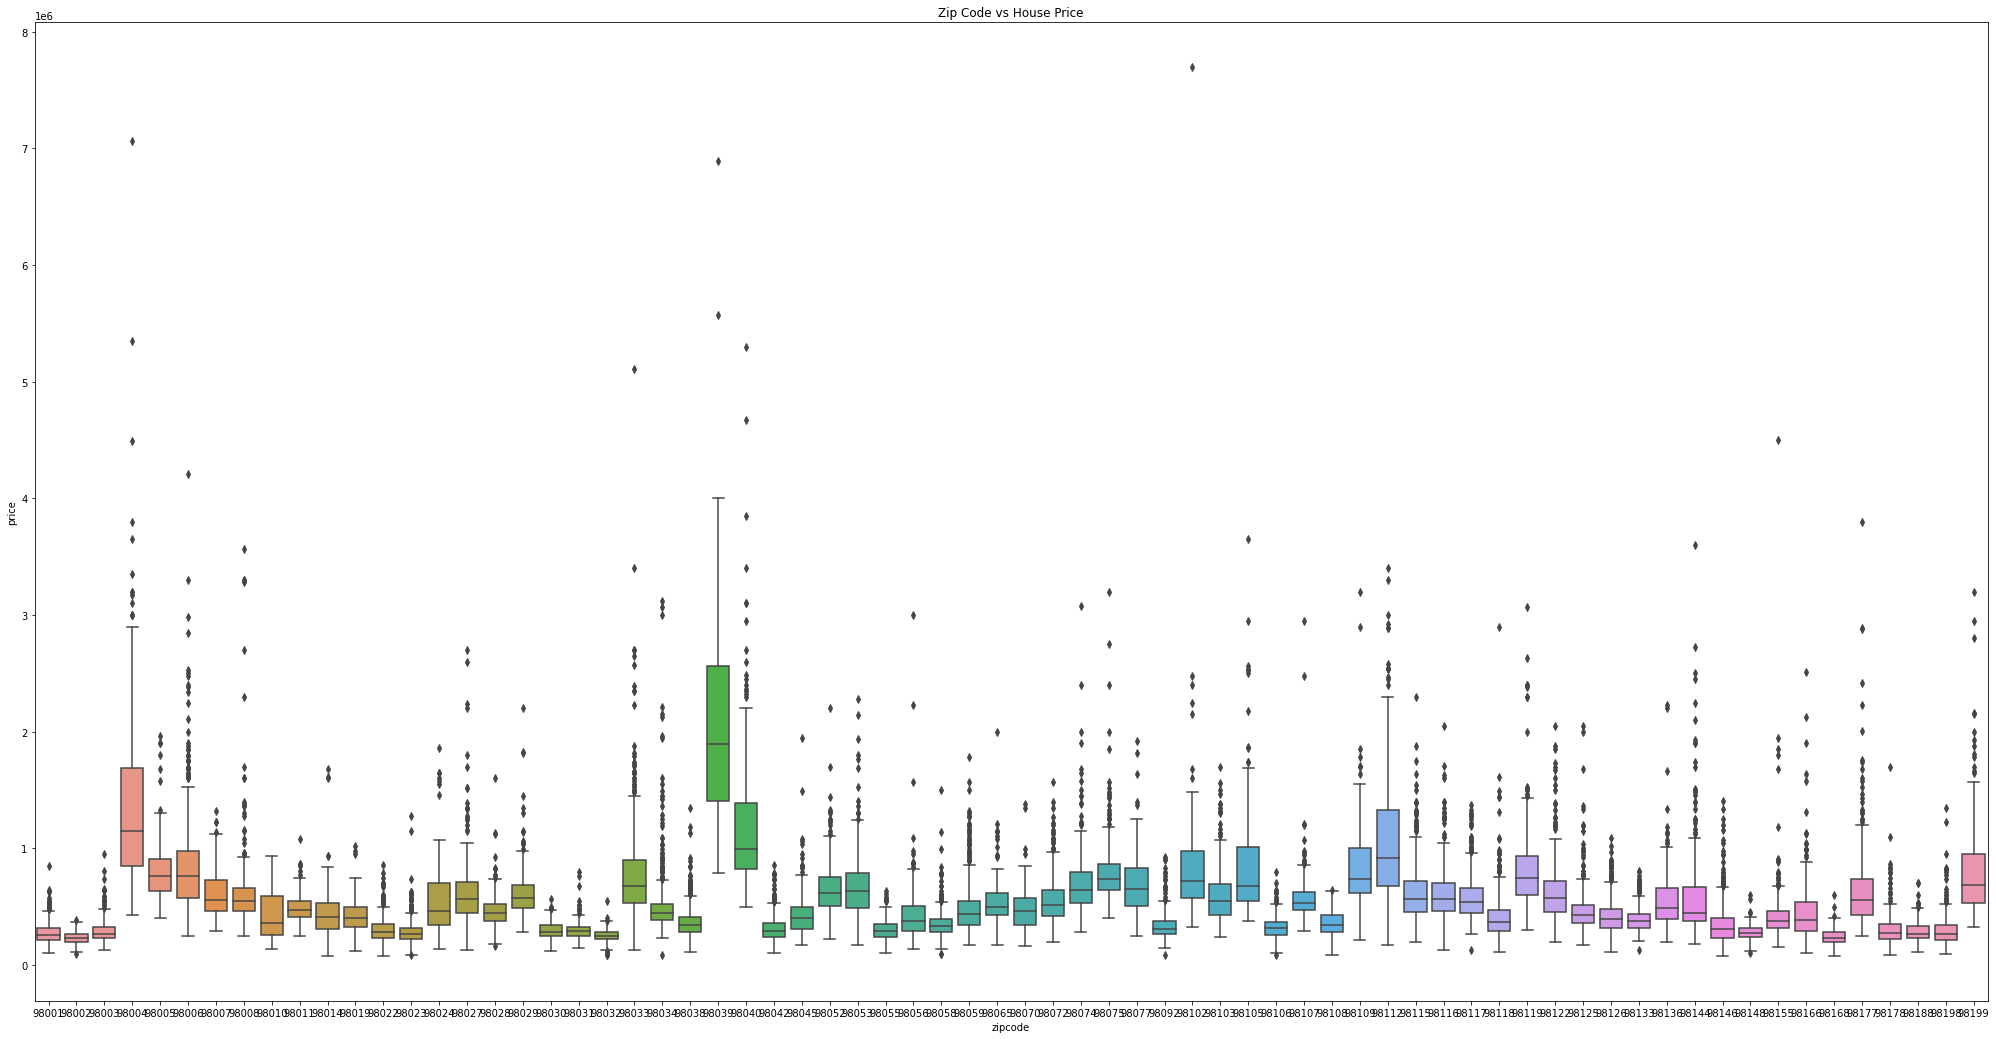

In [23]:
plt.subplots(figsize=(35, 18))
sns.boxplot(x='zipcode', y='price', data=data)
plt.title('Zip Code vs House Price')

In [24]:
# Average prices
data.groupby('zipcode')['price'].mean().sort_values(ascending=True)

zipcode
98002    2.342840e+05
98168    2.403284e+05
98032    2.512962e+05
98001    2.808047e+05
98148    2.849086e+05
             ...     
98102    9.015162e+05
98112    1.096239e+06
98040    1.194874e+06
98004    1.356524e+06
98039    2.161300e+06
Name: price, Length: 70, dtype: float64

* 98039 is the most expensive neighbourhood on average therefore generally high house prices
* 98002 is the neighbourhood with averagely cheap houses

Condition

Text(0.5, 1.0, 'Condition vs House Price')

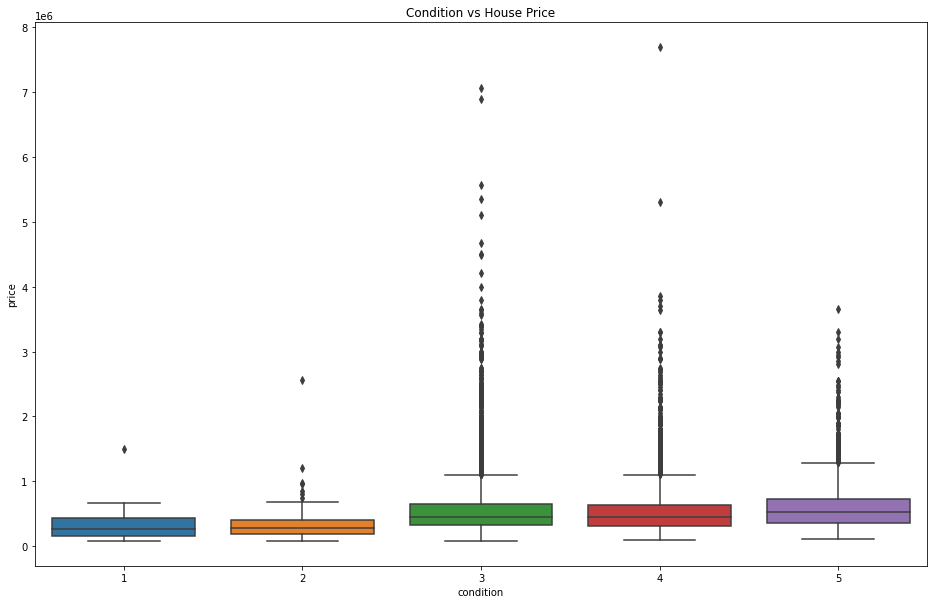

In [25]:
plt.subplots(figsize=(16, 10))
sns.boxplot(x='condition', y='price', data=data)
plt.title('Condition vs House Price')

* Houses of condition 5 fetch averagely high prices

Grade

Text(0.5, 1.0, 'Grade vs House Price')

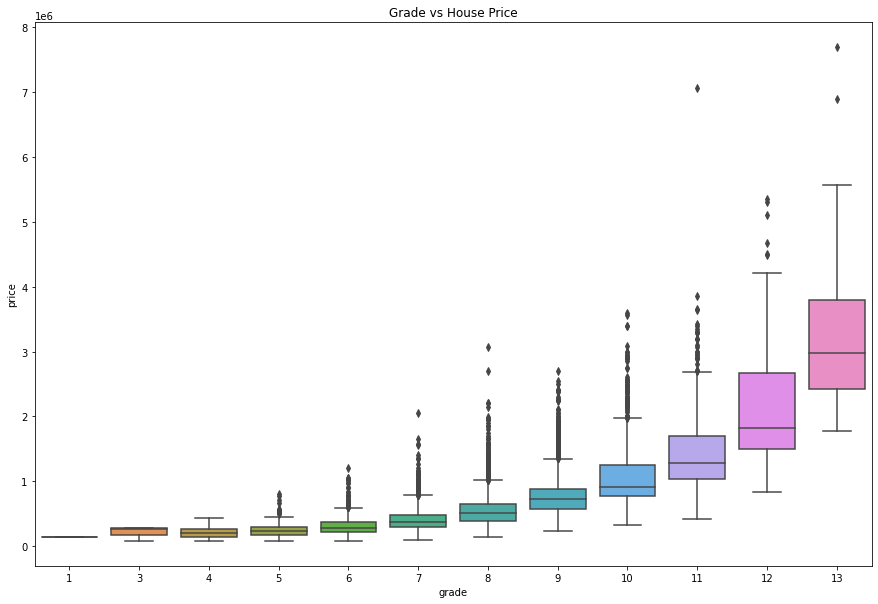

In [26]:
plt.subplots(figsize=(15, 10))
sns.boxplot(x='grade', y='price', data=data)
plt.title('Grade vs House Price')

* The higher the grade of the house the higher the price

Year of Renovation

Text(0.5, 1.0, 'Year of Renovation vs House Price')

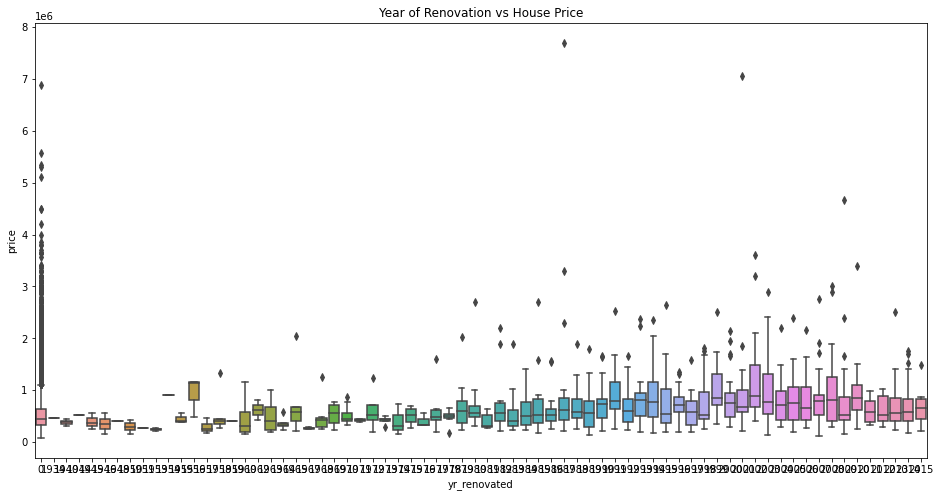

In [27]:
plt.subplots(figsize=(16, 8))
sns.boxplot(x='yr_renovated', y='price', data=data)
plt.title('Year of Renovation vs House Price')

* Year of renovation does not affect the price of the house
* Additionally, most of the houses have never been renovated

View

Text(0.5, 1.0, 'View vs House Price')

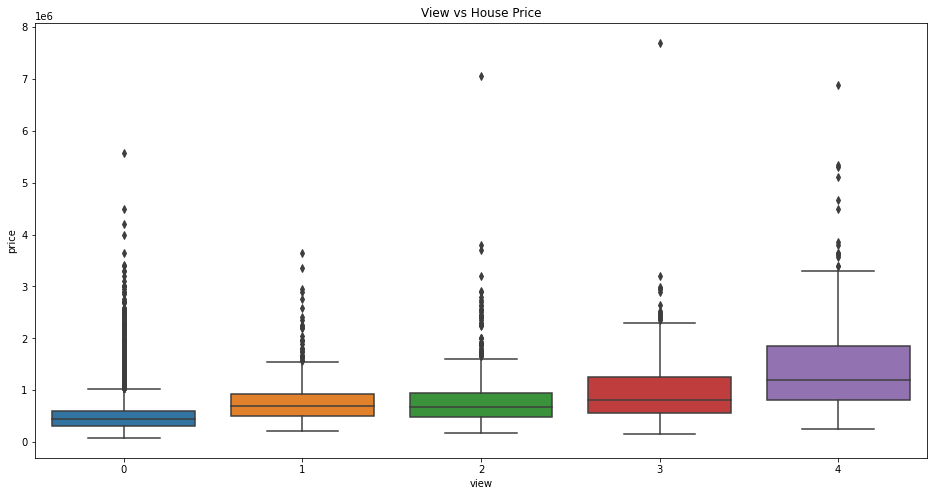

In [28]:
plt.subplots(figsize=(16, 8))
sns.boxplot(x='view', y='price', data=data)
plt.title('View vs House Price')

* Generally the higher the view the higher the price

**Deductions**
* From the above visual data analysis the following columns **sqft_lot, floors, yr_built** and **yr_renovated** DO NOT necessarily affect house prices.

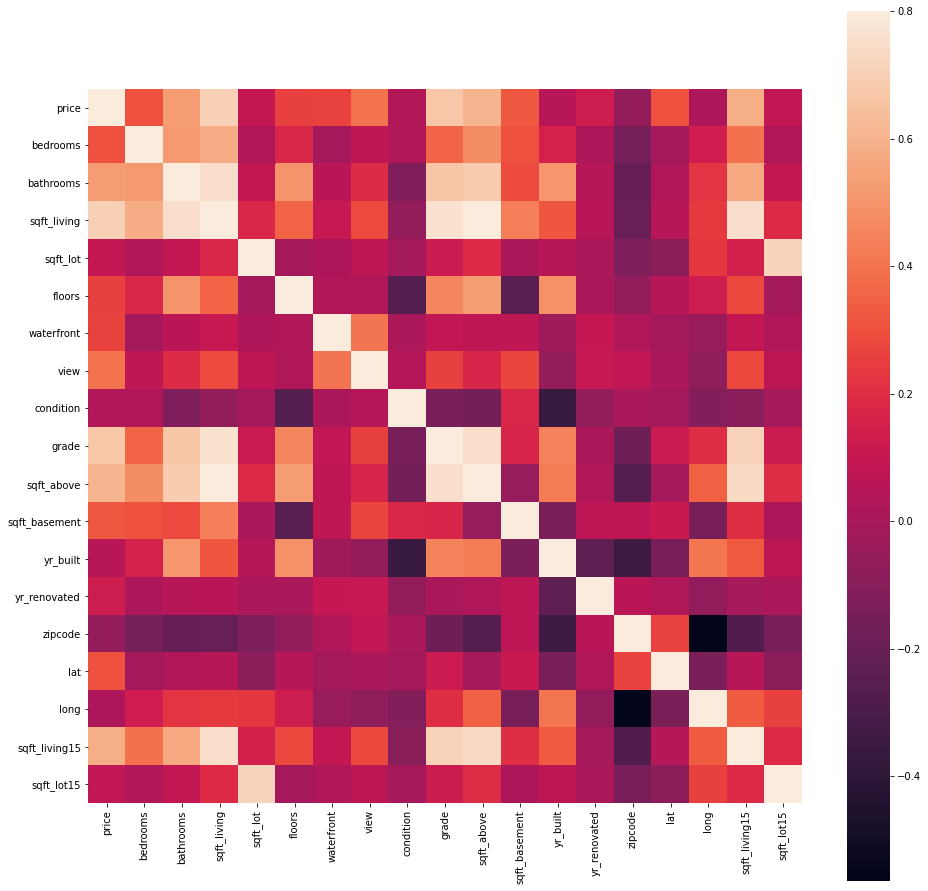

In [29]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True);

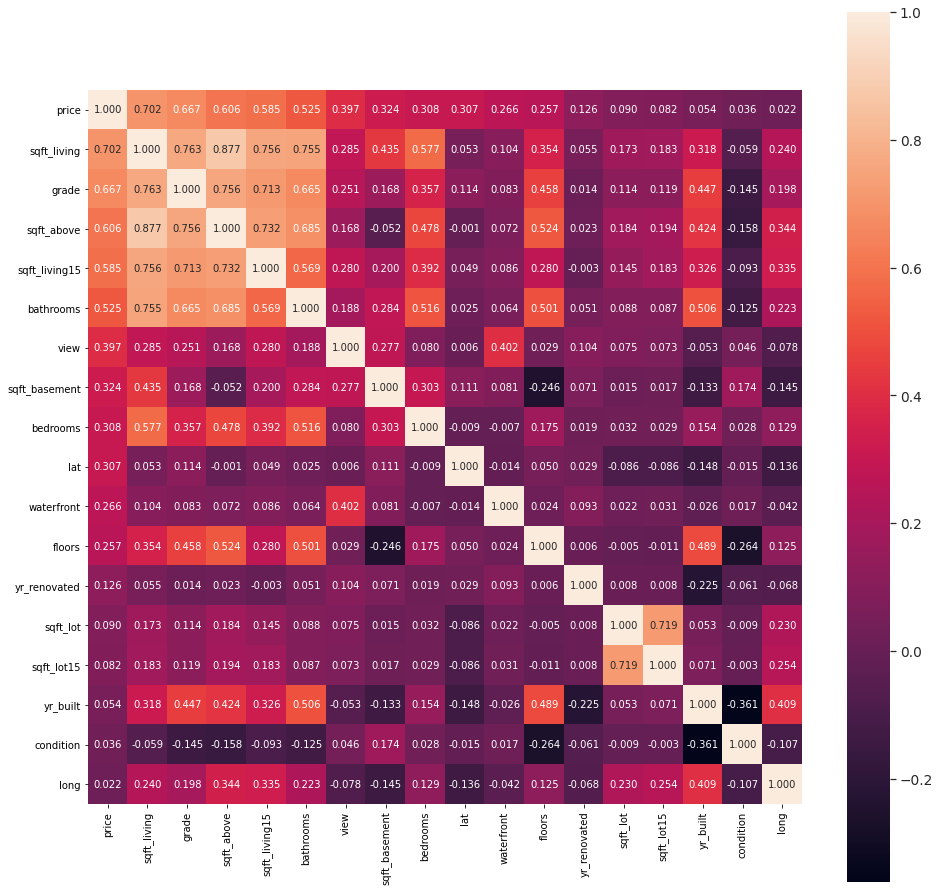

In [30]:
# Saleprice correlation matrix
plt.subplots(figsize=(16, 16))
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* As earlier observed **yr_renovated, sqft_lot, sqft_lot15, yr_built, condition** and **long** have low correlation to the house price, abs(r) < 0.15.
* We will drop **sqft_lot, sqft_lot15, yr_built, condition** and **long**.

Text(0.5, 1.0, 'Histogram of the variables')

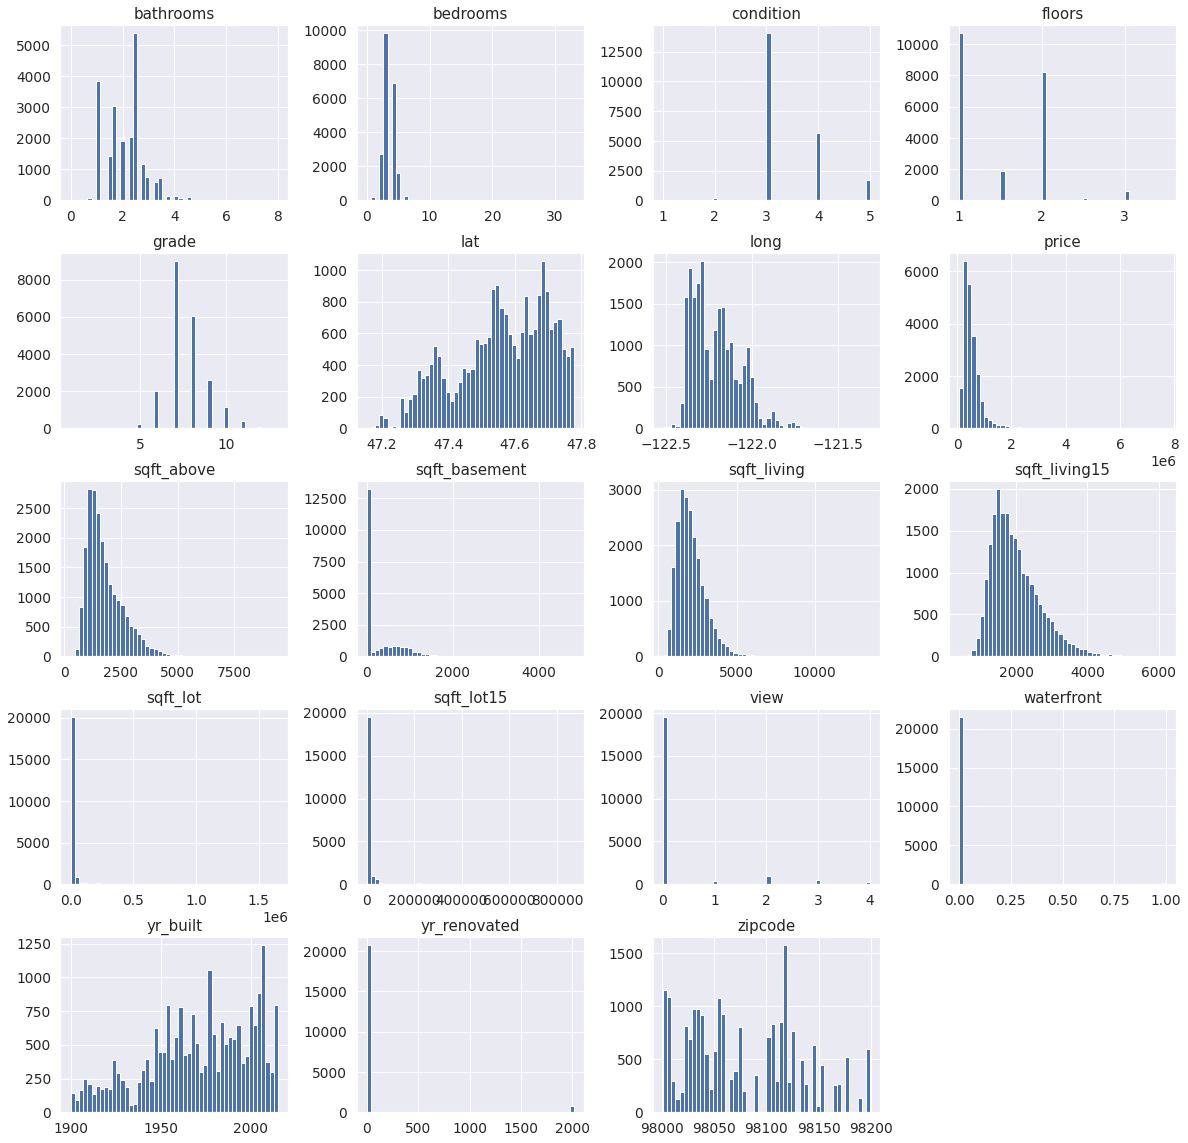

In [31]:
data.hist(bins=50, figsize=(20,20))
plt.title('Histogram of the variables')

## Tidying the Dataset

In [32]:
# Checking for duplicate values
print('Data 1: ', data.duplicated().any())

Data 1:  True


* The data has duplicate values

In [33]:
# Removing the duplicates from data
data.drop_duplicates(keep='first', inplace = True)

In [34]:
# Checking the new shape of the data
data.shape

(21608, 19)

* Other columns will be dropped as needed from analysis

## Multicollinearity check

In [106]:
y = data['price'] # dependent variable
X = data.drop('price', axis=1)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[23.271131345546063, 28.611251039294334, inf, 2.3776711708369054, 16.89312924475082, 1.2130320634261629, 1.5519309560363375, 34.70855682291615, 147.4316900115127, inf, inf, 9586.838086036072, 1.194941605776073, 1630634.56161363, 139002.32457902058, 1359460.1567726454, 27.10092354115342, 2.5987296375721973]


* There is presence of collinearity in the data

## Residual plots and heteroskedasticity testing

## Preprocessing

In [44]:
# Setting the X and y arrays
y = data['price'] # dependent variable
X = data.drop('price', axis=1)

In [45]:
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((15125, 18), (6483, 18))

## Building the Models

In [55]:
# Functions that will help build our models
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('Mean Absolute Error: ', mae)
    print('Mean Squared Error: ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Linear Regression

In [46]:
# Initiating the class
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [47]:
# print the intercept
print(lin_reg.intercept_)

7856409.089167015


In [48]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-38170.582644
bathrooms,40972.479898
sqft_living,90.840510
sqft_lot,0.181178
floors,4859.231299
waterfront,583367.622845
view,54204.743480
condition,25947.306283
grade,96546.523946
sqft_above,92.949842


**Interpreting the coefficients:**
* Holding all other features fixed, a 1 unit increase in average sqft_living is associated with an increase of KES 90.84.
* Holding all other features fixed, having the house proximal to a waterfront increases the price of the house by KES 583,367.62.
* Holding all other features fixed, a 1 unit increase in Avg. Area Number of floors is associated with an increase of KES 4,859.

In [49]:
# Prediction using our model
pred = lin_reg.predict(X_test)

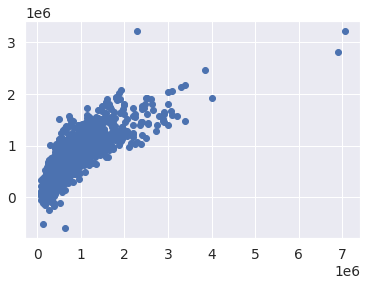

In [50]:
plt.scatter(y_test, pred)

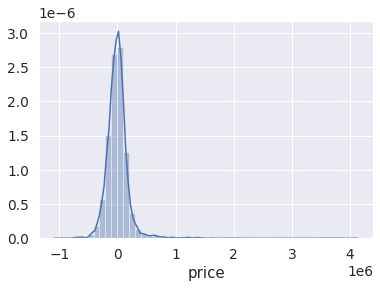

In [51]:
# Residual histogram
sns.distplot((y_test - pred), bins=50)

In [56]:
# Performance of our model
print_evaluate(y_test, lin_reg.predict(X_test))

Mean Absolute Error:  126230.34296278592
Mean Squared Error:  41057378311.105865
Root Mean Squared Error:  202626.20341679864
R2 Square 0.694757148637942


Ridge Regression

In [57]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

Mean Absolute Error:  126203.69698585292
Mean Squared Error:  41056960428.65017
Root Mean Squared Error:  202625.17224829242
R2 Square 0.6947602554030974


LASSO Regression

In [58]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

Mean Absolute Error:  126229.0916779324
Mean Squared Error:  41057318073.844826
Root Mean Squared Error:  202626.05477540352
R2 Square 0.6947575964744594


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278172966721871.06, tolerance: 204450814641.53082
  positive)


Elastic Net

In [60]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print_evaluate(y_test, pred)

Mean Absolute Error:  145723.69732322468
Mean Squared Error:  50867363882.94412
Root Mean Squared Error:  225537.94333314322
R2 Square 0.6218243874402165


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414012125309583.6, tolerance: 204450814641.53082
  positive)


Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=101)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)

print_evaluate(y_test, pred)

Mean Absolute Error:  101717.66365226073
Mean Squared Error:  25702894675.957535
Root Mean Squared Error:  160321.22341086826
R2 Square 0.8112205272069463
